# Libraries and data importing

Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing

Importing data

In [2]:
activities = pd.read_parquet('../data-raw/activities.parquet')
activities

,contributor,category,repository,activity,date
0,AmplabJenkins,bot,apache/spark,Commenting pull request,2022-11-25 09:55:19+00:00
1,AmplabJenkins,bot,apache/spark,Commenting pull request,2022-11-25 09:55:23+00:00
2,AmplabJenkins,bot,apache/spark,Commenting pull request,2022-11-25 09:55:26+00:00
3,analysis-bot,bot,facebook/react-native,Commenting pull request,2022-11-25 09:55:27+00:00
4,neos-bot,bot,neos/neos-ui-compiled,Pushing commits,2022-11-25 09:55:47+00:00
...,...,...,...,...,...
1015418,798388,human,879434,Reviewing code,2023-04-15 16:06:15+00:00
1015419,798388,human,879434,Reviewing code,2023-04-15 16:07:26+00:00
1015420,784775,human,643744,Creating branch,2023-04-15 16:07:33+00:00
1015421,784775,human,888378,Opening pull request,2023-04-15 16:08:07+00:00


In [10]:
random_user = activities['contributor'].sample().values[0]
contributor = (
    activities[activities['contributor'] == random_user][['repository', 'activity']]
    .groupby(['repository', 'activity'])['activity']
    .count()
    .reset_index(name='n_activities')
    .set_index('repository')
    .rename_axis(None)
    .pivot(columns='activity', values='n_activities')
    .fillna(0)
    .astype(int)
)
contributor

activity,Closing pull request,Commenting pull request,Creating branch,Deleting branch,Opening pull request,Pushing commits
engine-flutter-autoroll/flutter,0,0,1663,1659,0,1678
engine-flutter-autoroll/packages,0,0,362,356,0,361
engine-flutter-autoroll/plugins,0,0,187,197,0,187
flutter/flutter,715,743,0,0,1671,0
flutter/packages,262,263,0,0,359,0
flutter/plugins,127,128,0,0,187,0


# Heat Map

<Axes: xlabel='activity'>

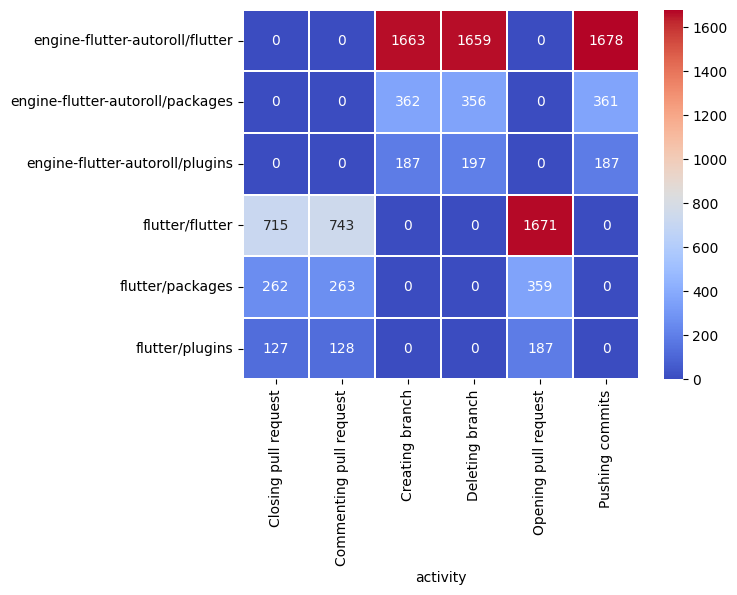

In [11]:
sns.heatmap(contributor, annot=True, fmt='d', cmap='coolwarm', linewidths=0.1)

<Axes: xlabel='activity'>

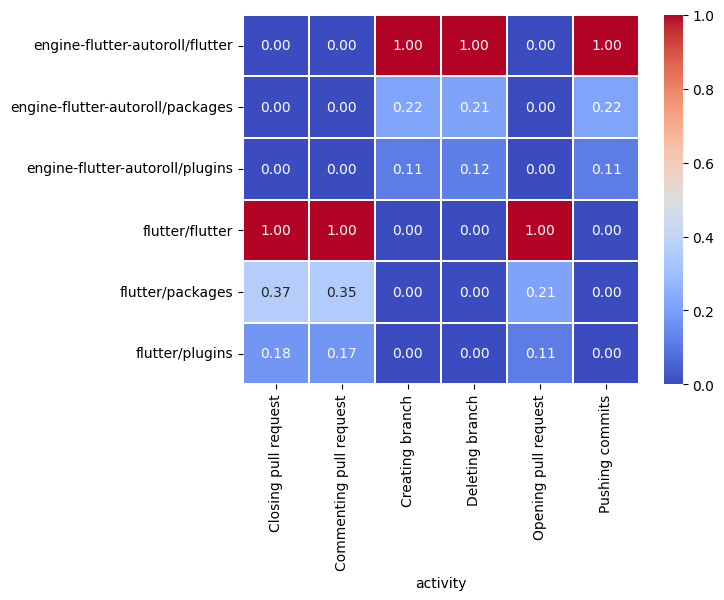

In [12]:
# By Activities
by_activities = contributor.div(contributor.max(axis=0), axis=1)
sns.heatmap(by_activities, annot=True, fmt='0.2f', cmap='coolwarm', linewidths=0.1)

<Axes: xlabel='activity'>

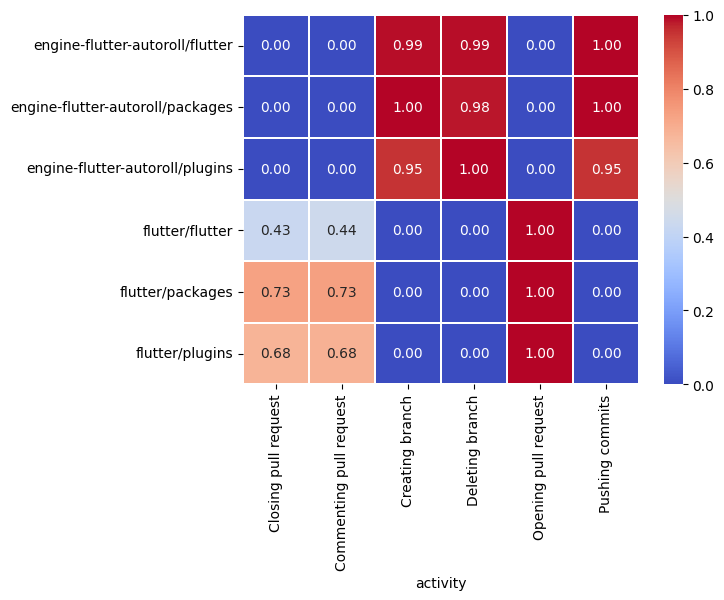

In [13]:
# By Repositories
by_repositories = contributor.div(contributor.max(axis=1), axis=0)
sns.heatmap(by_repositories, annot=True, fmt='0.2f', cmap='coolwarm', linewidths=0.1)

# Cluster Map

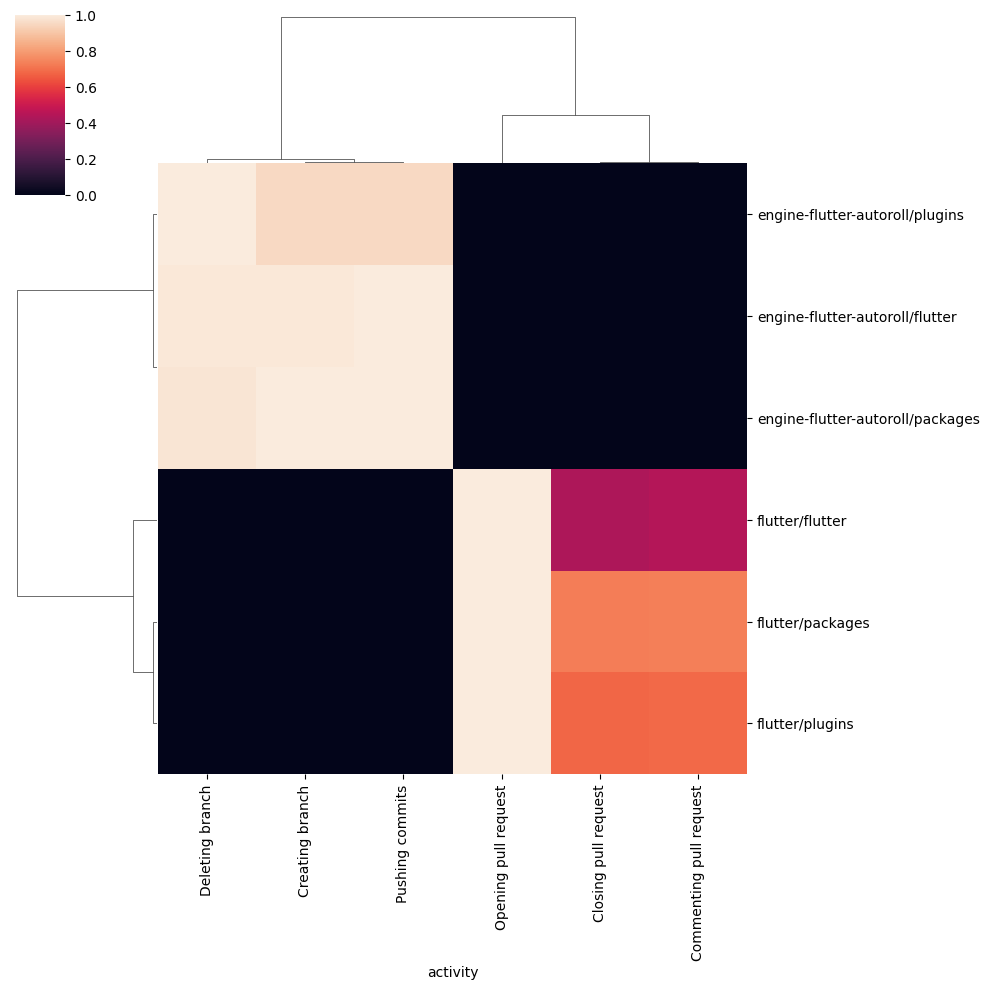

In [17]:
sns.clustermap(by_repositories, method='centroid')

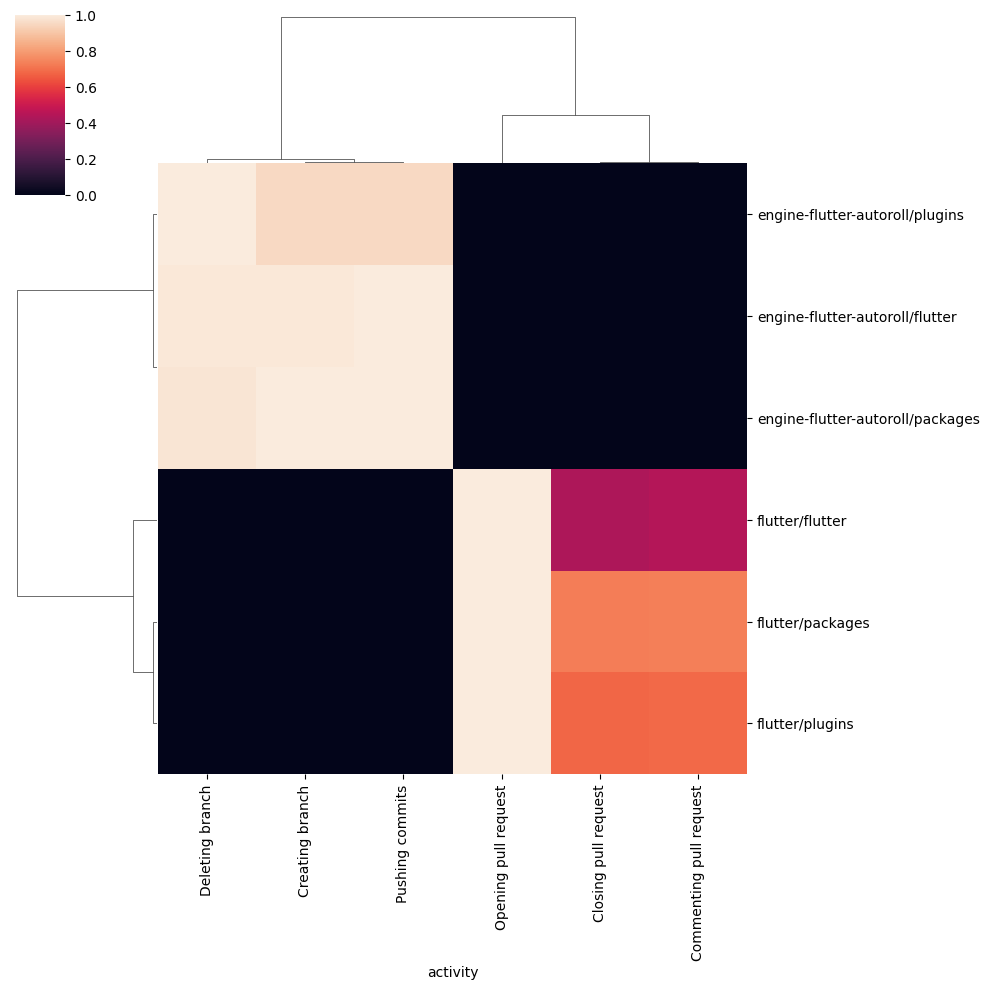

In [19]:
sns.clustermap(by_repositories, method='centroid')